In [2]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from utils import *

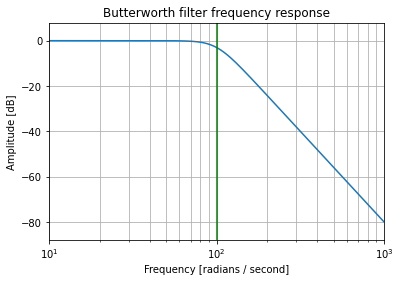

In [4]:
b, a = signal.butter(4, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

In [212]:
df = load_amb_sin_data("amb_sin/sine_fx_41Hz_0RPM.txt")

In [213]:
sample_dt = (df["datetime"] - df["datetime"].shift()).mean().delta*1e-9
sample_frequency = 1/sample_dt
nyquist_freq = 0.5 * sample_frequency
cutoff = 80

In [214]:
sample_dt

0.000195312

In [215]:
nyquist_fs

2560.006553616777

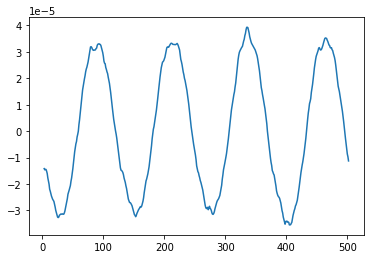

In [216]:
plt.plot(df["ax"].iloc[:500])

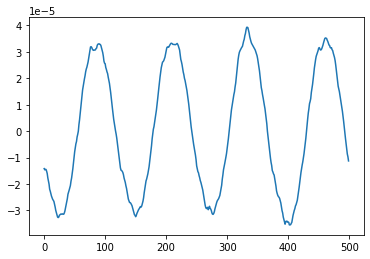

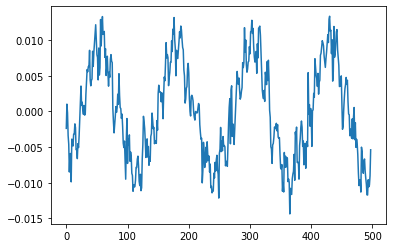

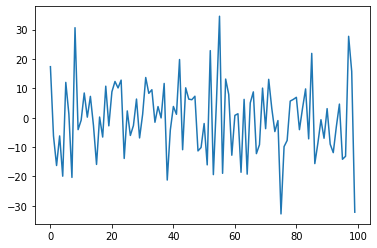

In [217]:
max_i = 500
x = df["ax"].values.flatten()[:max_i]
dx = first_order_diff(x.reshape((1, -1)), dt=sample_dt).flatten()[:max_i]
ddx = second_order_diff(x.reshape((1, -1)), dt=sample_dt).flatten()[:max_i]
plt.plot(x)
plt.show()
plt.plot(dx)
plt.show()
plt.plot(ddx[:100])

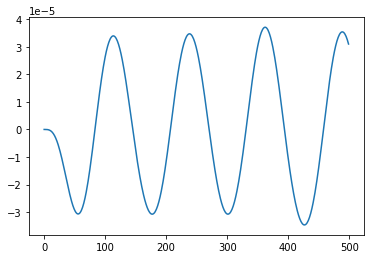

In [218]:
inputs = df["ax"].values.flatten()
b, a = signal.butter(4, cutoff/nyquist_freq,  btype='low', analog=False)
y = signal.lfilter(b, a, inputs)

plt.plot(y[:500])

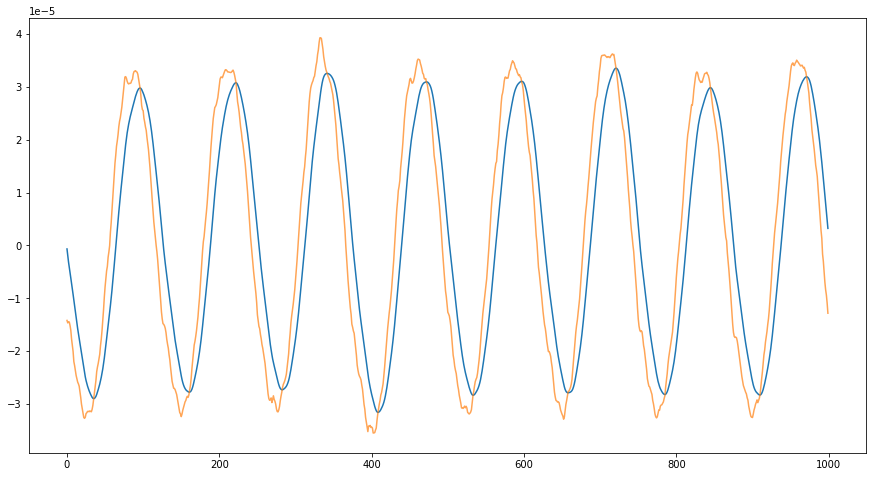

In [219]:
inputs = df["ax"].values.flatten()
b, a = signal.butter(1, cutoff/nyquist_freq,  btype='low', analog=False)
y = signal.lfilter(b, a, inputs)


plt.figure(figsize=(15, 8))
plt.plot(y[:1000])
plt.plot(inputs[:1000], alpha=.7)

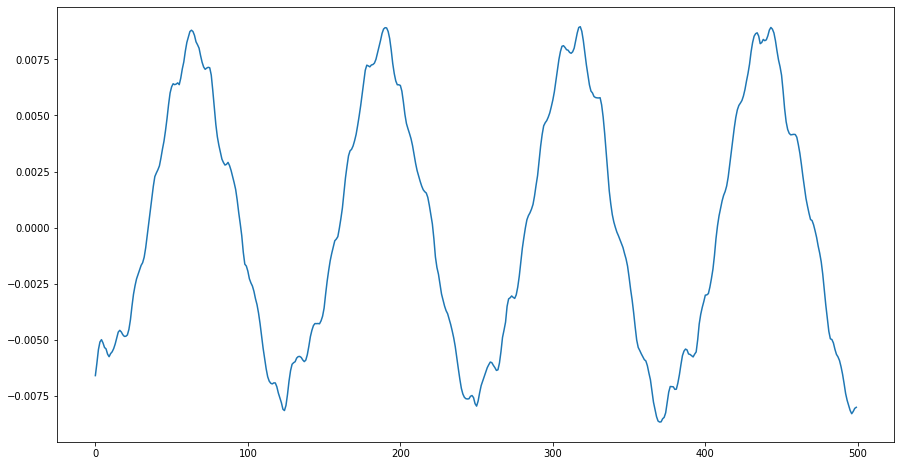

In [220]:
diff = first_order_diff(y.reshape((1, -1)), sample_dt)
plt.figure(figsize=(15, 8))
plt.plot(diff.flatten()[:500])

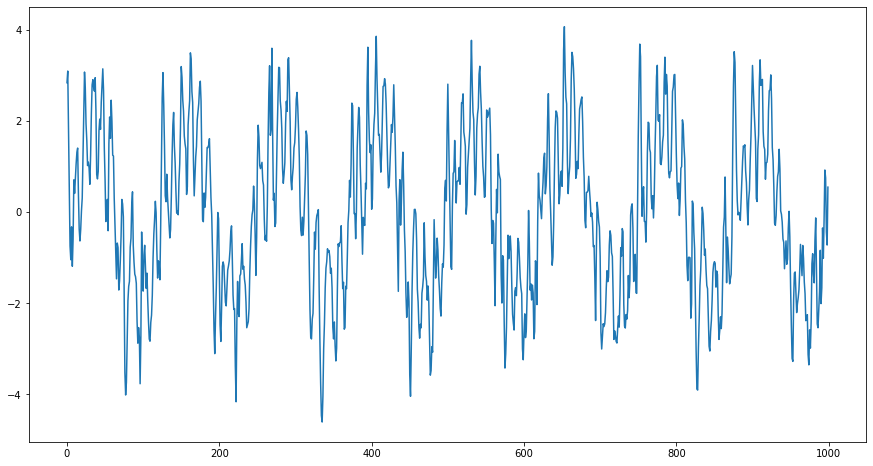

In [221]:
diff = second_order_diff(y.reshape((1, -1)), sample_dt)
plt.figure(figsize=(15, 8))
plt.plot(diff.flatten()[:1000])

In [222]:
savgol_filter = signal.savgol_filter
params = dict( window_length = 31, polyorder = 3)
x = savgol_filter(inputs, **params, deriv=0)
dx = savgol_filter(inputs, **params, deriv=1)/(sample_dt)
ddx = savgol_filter(inputs, **params, deriv=2)/(sample_dt**2)


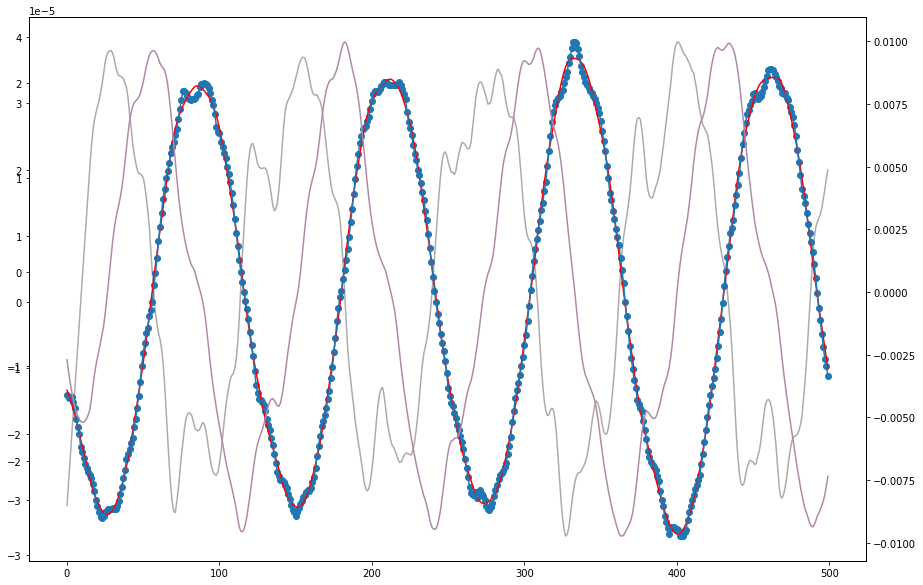

In [223]:


fix, ax = plt.subplots(figsize=(15,10))
ax2 = ax.twinx()
ax3 = ax2.twinx()

ax.plot(ddx[:500], label="ddx", color="#ABABAB")
ax3.plot(dx[:500], color= "#B088AA")
ax2.plot(x[:500], color= "red")
ax2.plot(inputs[:500])
ax2.scatter(list(range(500)), inputs[:500])

In [179]:
ax2.twinx()

<AxesSubplot:label='fbf73ed7-ea30-49ed-ba2c-10303bf7d91b'>